<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_SVM_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D, axes3d     # illustrate classification done by adding an additional feature for non-linearity

# Load Data

In [5]:
X, y = make_blobs(centers=4, random_state=8)        # X contains coordinates
y = y%2         # to create only binary class

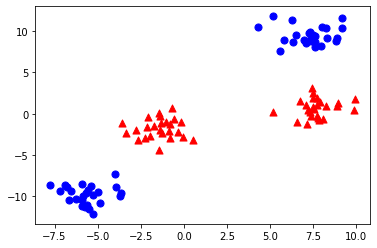

In [14]:
attrs0 = {'c':'b', 's':50, 'marker':'o', 'cmap': 'pl.get_cmap("viridis")'}
attrs1 = {'c':'r', 's':50, 'marker':'^', 'cmap': 'pl.get_cmap("viridis")'}
fig,ax = plt.subplots(1,1)
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
plt.show()

# Train Model

## Linear

In [13]:
model_linear = LinearSVC(max_iter=5000).fit(X,y)
coef_linear = model_linear.coef_[0]
c_linear = model_linear.intercept_[0]

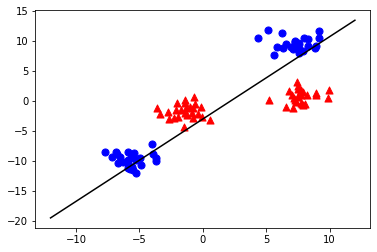

In [16]:
fig,ax = plt.subplots(1,1)
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
x = np.linspace(-12,12)
ax.plot(x, -(x*coef_linear[0] + c_linear)/coef_linear[1], 'k')
plt.show()

# In this case, class can't be separated with a linear line

## Non-Linear

In [18]:
X_new = np.hstack([X, X[:,1:]**2])      # derive z coordinates and add into X (which contains x,y coordinates), based on z = y^2

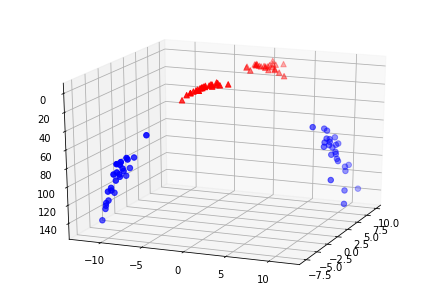

In [27]:
fig    = plt.figure()
ax     = Axes3D( fig, elev=-160, azim=-22)
class0 = (X_new[y==0, 0], X_new[y==0, 1], X_new[y==0,2])
class1 = (X_new[y==1, 0], X_new[y==1, 1], X_new[y==1,2])
ax.scatter( *class0, c='b', marker='o', s=30)
ax.scatter( *class1, c='r', marker='^', s=30)

In [23]:
model_nonlinear  = LinearSVC(max_iter=5000).fit(X_new, y)
coef_nonlinear   = model_nonlinear.coef_[0]
c_nonlinear = model_nonlinear.intercept_

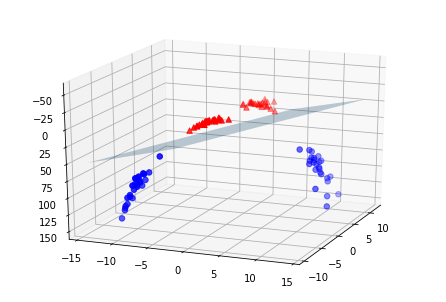

In [33]:
fig    = plt.figure()
ax     = Axes3D( fig, elev=-160, azim=-22)
class0 = (X_new[y==0, 0], X_new[y==0, 1], X_new[y==0,2])
class1 = (X_new[y==1, 0], X_new[y==1, 1], X_new[y==1,2])
ax.scatter( *class0, c='b', marker='o', s=30)
ax.scatter( *class1, c='r', marker='^', s=30)

xx = np.linspace( X_new[:,0].min()-2, X_new[:,0].max()+2, 200)
yy = np.linspace( X_new[:,1].min()-2, X_new[:,1].max()+2, 200)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef_nonlinear[0]*XX + coef_nonlinear[1]*YY + c_nonlinear)/-coef_nonlinear[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Linear plane is predicted by LinearSVM to clssify red and blue with third dimension, z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'level2'
  """


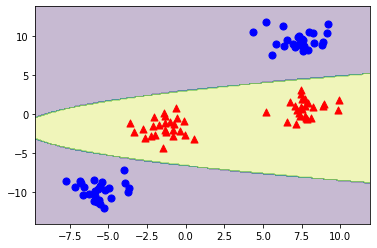

In [37]:
fig,ax  = plt.subplots(1,1)
data    = np.c_[ XX.ravel(), YY.ravel(), YY.ravel() **2]
dec     = model_nonlinear.predict(data)
dec     = dec.reshape( XX.shape )
ax.contourf( XX, YY, dec, level2=[dec.min(), 0, dec.max()], alpha=0.3 )
attrs0 = {'c':'b', 's':50, 'marker':'o', 'cmap': 'pl.get_cmap("viridis")'}
attrs1 = {'c':'r', 's':50, 'marker':'^', 'cmap': 'pl.get_cmap("viridis")'}
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
plt.show()

# Final outcome. Perfect!